In [1]:

# import tensorflow


2021-11-30 20:20:58.685983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-30 20:20:58.685999: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [25]:
# First step, import libraries.
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow

In [26]:
# Import the dataset and encode the date
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [27]:
df.tail()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
3045852,1508457360,5690.88,5690.88,5690.88,5690.88,0.168941,961.421706,5690.880000,2017-10-19
3045853,1508457420,5698.13,5704.10,5695.63,5704.10,2.311662,13174.852877,5699.300163,2017-10-19
3045854,1508457480,5695.62,5695.64,5694.00,5695.64,0.129647,738.409647,5695.533637,2017-10-19
3045855,1508457540,5700.39,5700.39,5698.69,5698.69,0.085426,486.929798,5700.004031,2017-10-19
3045856,1508457600,5700.00,5700.00,5698.68,5700.00,0.116847,665.913860,5699.046463,2017-10-20


In [28]:
Real_Price

date
2011-12-31       4.472579
2012-01-01       4.680778
2012-01-02       5.000000
2012-01-03       5.145917
2012-01-04       5.195443
                 ...     
2017-10-16    5673.302997
2017-10-17    5625.281402
2017-10-18    5401.841422
2017-10-19    5653.877092
2017-10-20    5699.046463
Name: Weighted_Price, Length: 2118, dtype: float64

In [29]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]#0 to (2118-30)
df_test= Real_Price[len(Real_Price)-prediction_days:]#(2118-30) to 2118

In [30]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [31]:
training_set

array([[2.99503609e-05],
       [7.33509530e-05],
       [1.39895192e-04],
       ...,
       [8.20604291e-01],
       [8.25179049e-01],
       [8.19773409e-01]])

In [32]:
print(len(X_train))
print(len(y_train))

2087
2087


In [33]:
X_train.shape[1:]
# X_train.shape[1]
# y_train[0]


(1, 1)

In [34]:
# Importing the Keras libraries and packages
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,Activation, Flatten, Conv1D, MaxPooling1D
from keras.layers import LSTM,BatchNormalization

In [23]:
#LSTM architecture 1
# Initialising the RNN
lstm_model = Sequential()

# Adding the input layer and the LSTM layer
lstm_model.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
lstm_model.add(Dense(units = 1))

# Compiling the RNN
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['acc'])
model.summary()

import time

start_time = time.time()
# Fitting the RNN to the Training set
history = lstm_model.fit(X_train, y_train, batch_size = 5, epochs = 50,validation_split=0.1)
end_time = time.time()

training_time = end_time - start_time
print(training_time)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_2 (LSTM)               (None, 1, 60)             26640     
                                                                 
 lstm_3 (LSTM)               (None, 1, 80)             45120     
                                                                 
 lstm_4 (LSTM)               (None, 120)               96480     
                                                                 
 dense_1 (Dense)             (None, 1)                 121       
                                                                 
Total params: 178,761
Trainable params: 178,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
376/376 [============================

38.125545263290405


In [21]:

#LSTM artictecture 2
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
# model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
# model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['acc'])

start_time = time.time()
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, batch_size = 5, epochs = 50,validation_split=0.1)
end_time = time.time()

training_time = end_time - start_time
print(training_time)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_2 (LSTM)               (None, 1, 60)             26640     
                                                                 
 lstm_3 (LSTM)               (None, 1, 80)             45120     
                                                                 
 lstm_4 (LSTM)               (None, 120)               96480     
                                                                 
 dense_1 (Dense)             (None, 1)                 121       
                                                                 
Total params: 178,761
Trainable params: 178,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
376/376 [============================

98.89930891990662


In [21]:
cnn_model = Sequential()

cnn_model.add(Conv1D(128,1,input_shape=(X_train.shape[1],1)))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))
# cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(64,1))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))
# cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(32,1))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))
# cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())
cnn_model.add(Dense(64))

cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 1, 128)            256       
_________________________________________________________________
activation_1 (Activation)    (None, 1, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1, 64)             8256      
_________________________________________________________________
activation_2 (Activation)    (None, 1, 64)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1, 32)            

In [24]:
cnn_model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train, y_train, batch_size = 5, epochs = 50,validation_split=0.1)

NameError: name 'cnn_model' is not defined

In [ ]:
cnn_model.save('model2.h5')

In [ ]:
model.save('model1.h5')

In [ ]:
lstm_model.save("model.h5")

In [25]:
cnn_history.history.keys()


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<Figure size 432x288 with 0 Axes>

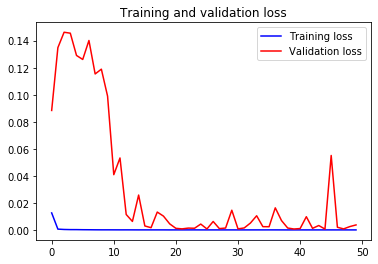

<Figure size 432x288 with 0 Axes>

In [28]:
# acc = cnn_history.history['acc']
# val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']
epochs = range(len(loss))
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.savefig('train3.jpg')
plt.legend()
 
plt.figure()


In [29]:
model = load_model("model2.h5")

In [7]:
# split data
prediction_days = 30
#test Set
df_test= Real_Price[len(Real_Price)-prediction_days:]#(2118-30) to 2118

In [9]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)

(30, 1, 1)

In [32]:
import time
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

pred_start_time = time.time()
predicted_BTC_price = model.predict(inputs)
pred_end_time = time.time()


pred_time = pred_end_time -pred_start_time 
print(pred_time)


predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

0.166825532913208


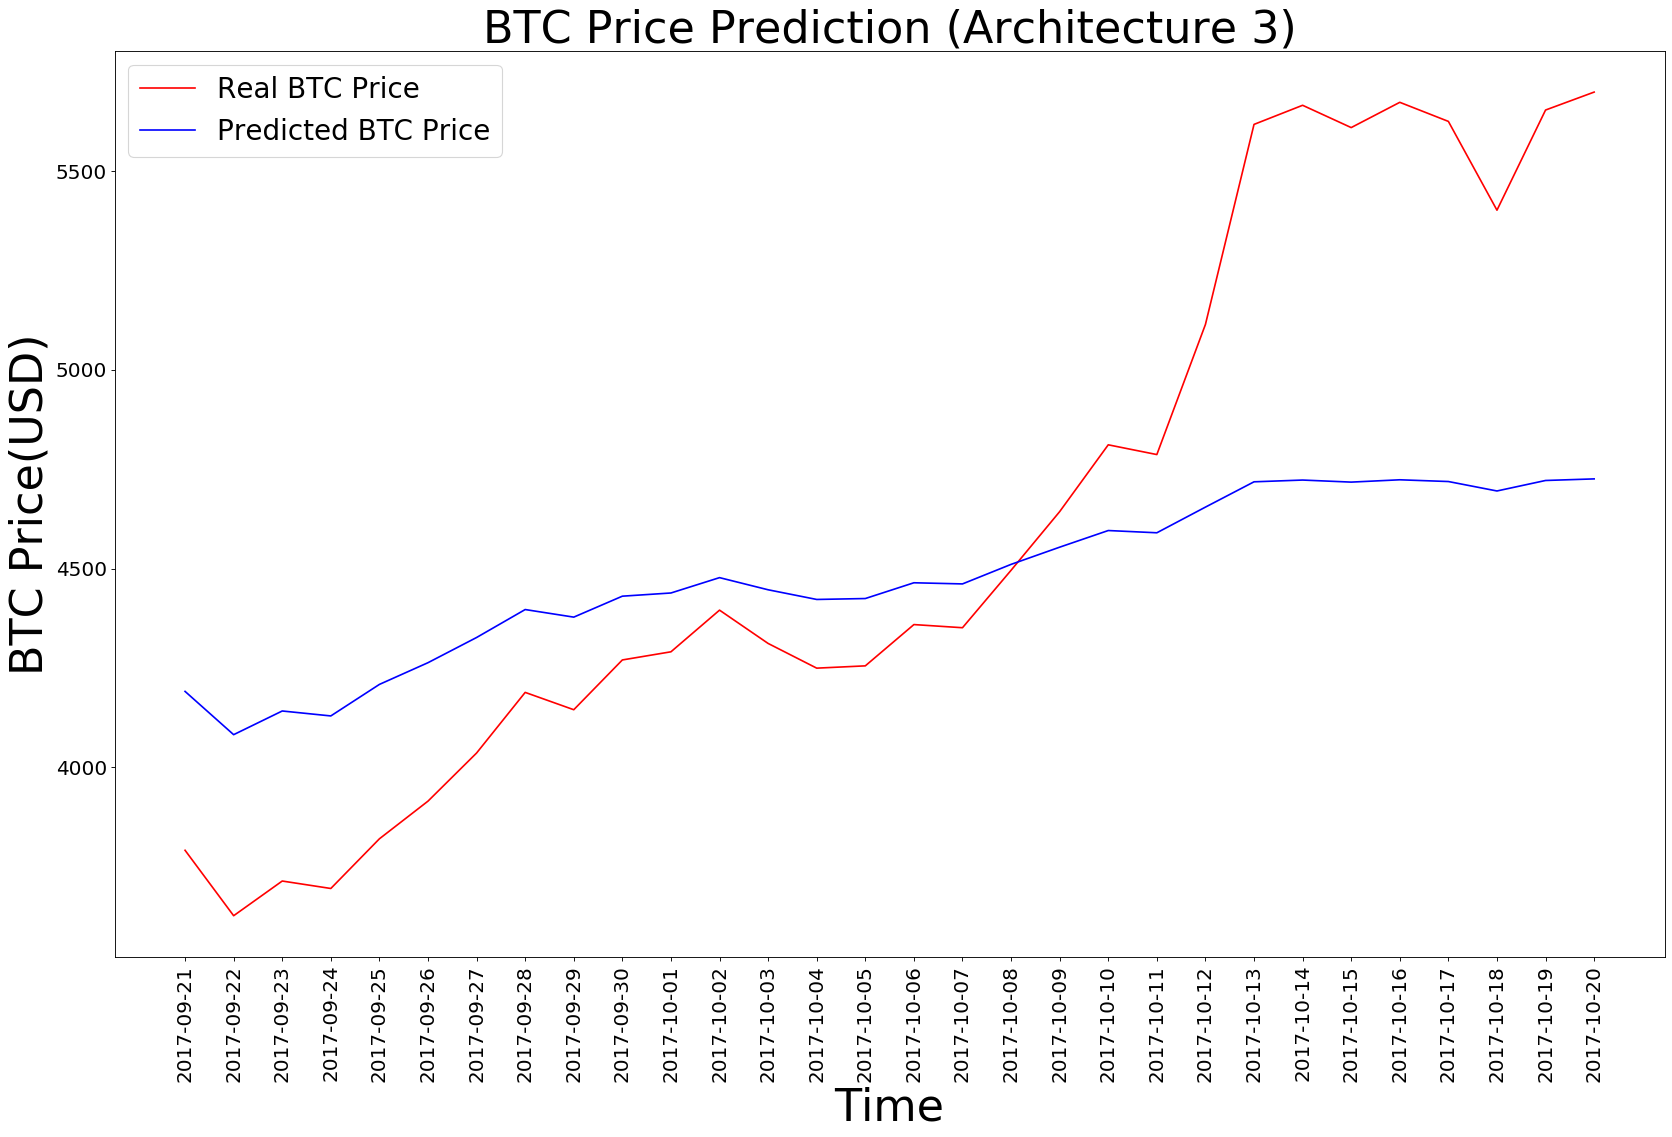

In [34]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction (Architecture 3)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.savefig("prediction3.jpg")
plt.legend(loc=2, prop={'size': 25})
plt.show()

0.40701794624328613


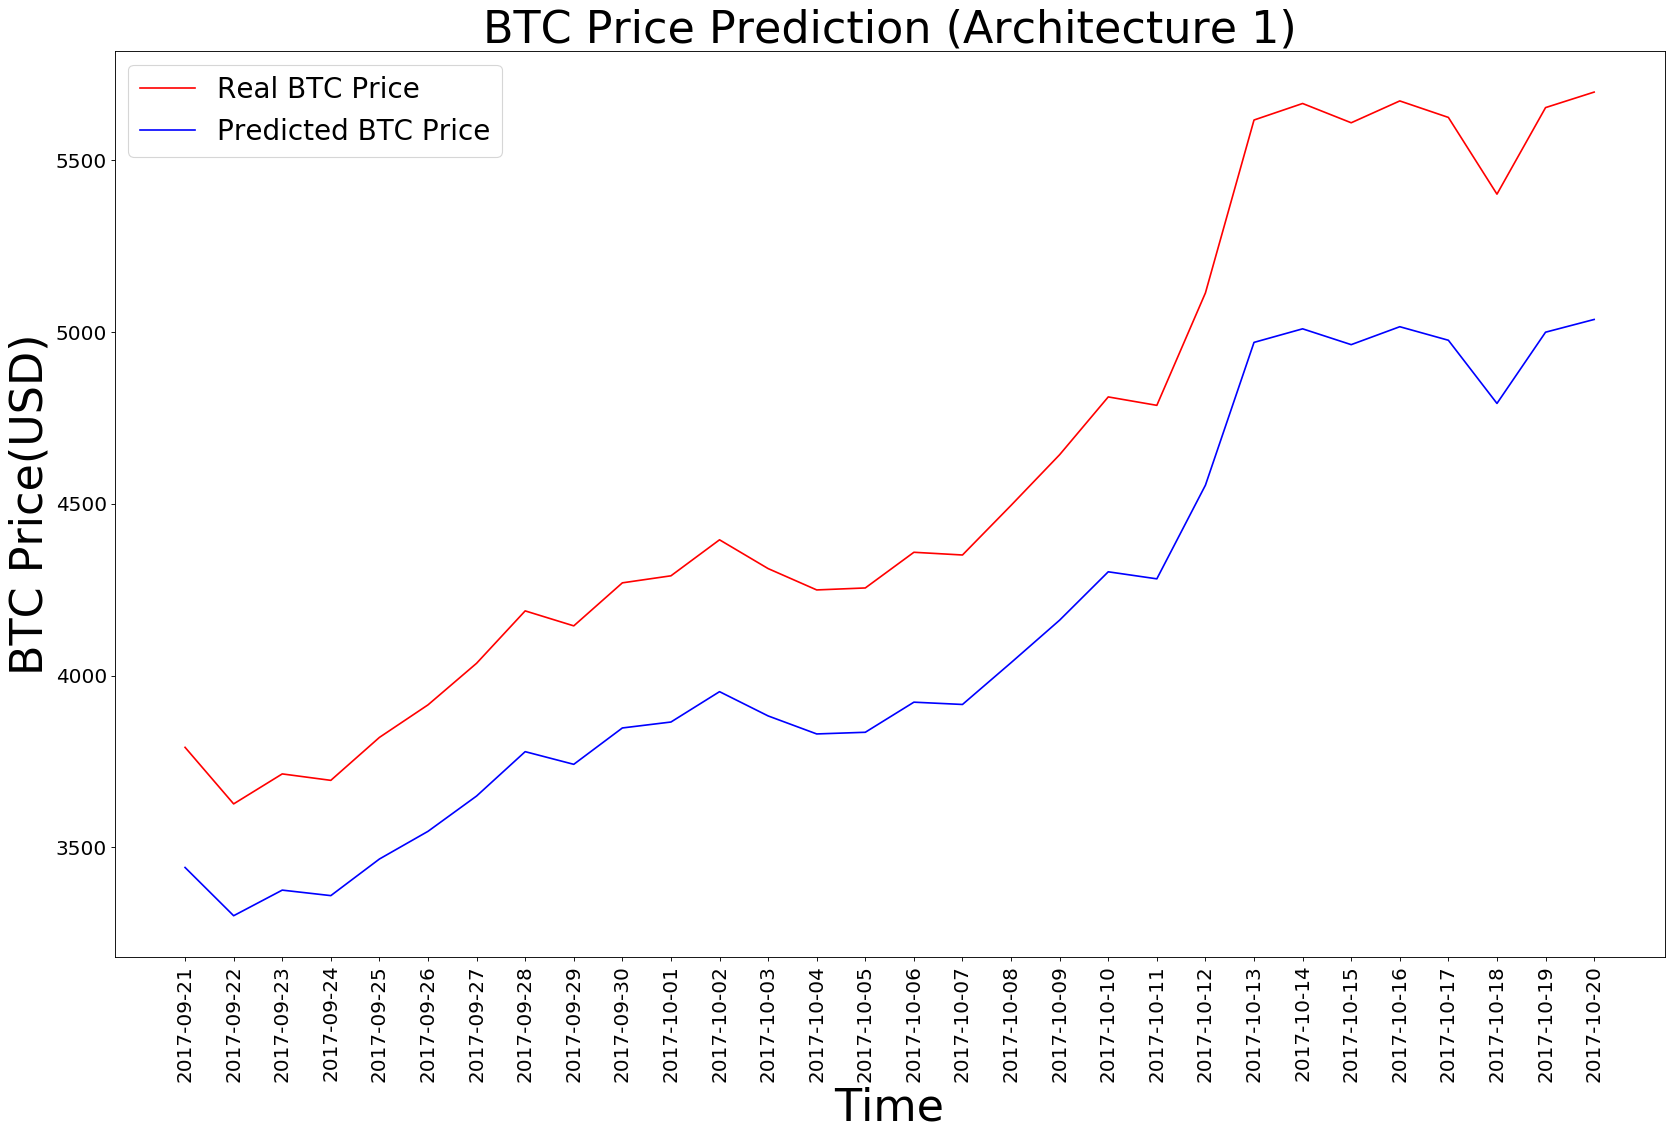

In [43]:
# prediction with architecture 1
model = load_model("model.h5")

# split data
prediction_days = 30
#test Set
df_test= Real_Price[len(Real_Price)-prediction_days:]#(2118-30) to 2118

test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)

import time
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

pred_start_time = time.time()
predicted_BTC_price = model.predict(inputs)
pred_end_time = time.time()


pred_time = pred_end_time -pred_start_time 
print(pred_time)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)



# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction (Architecture 1)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.savefig("prediction1.jpg")
plt.legend(loc=2, prop={'size': 25})
plt.show()

0.5446903705596924


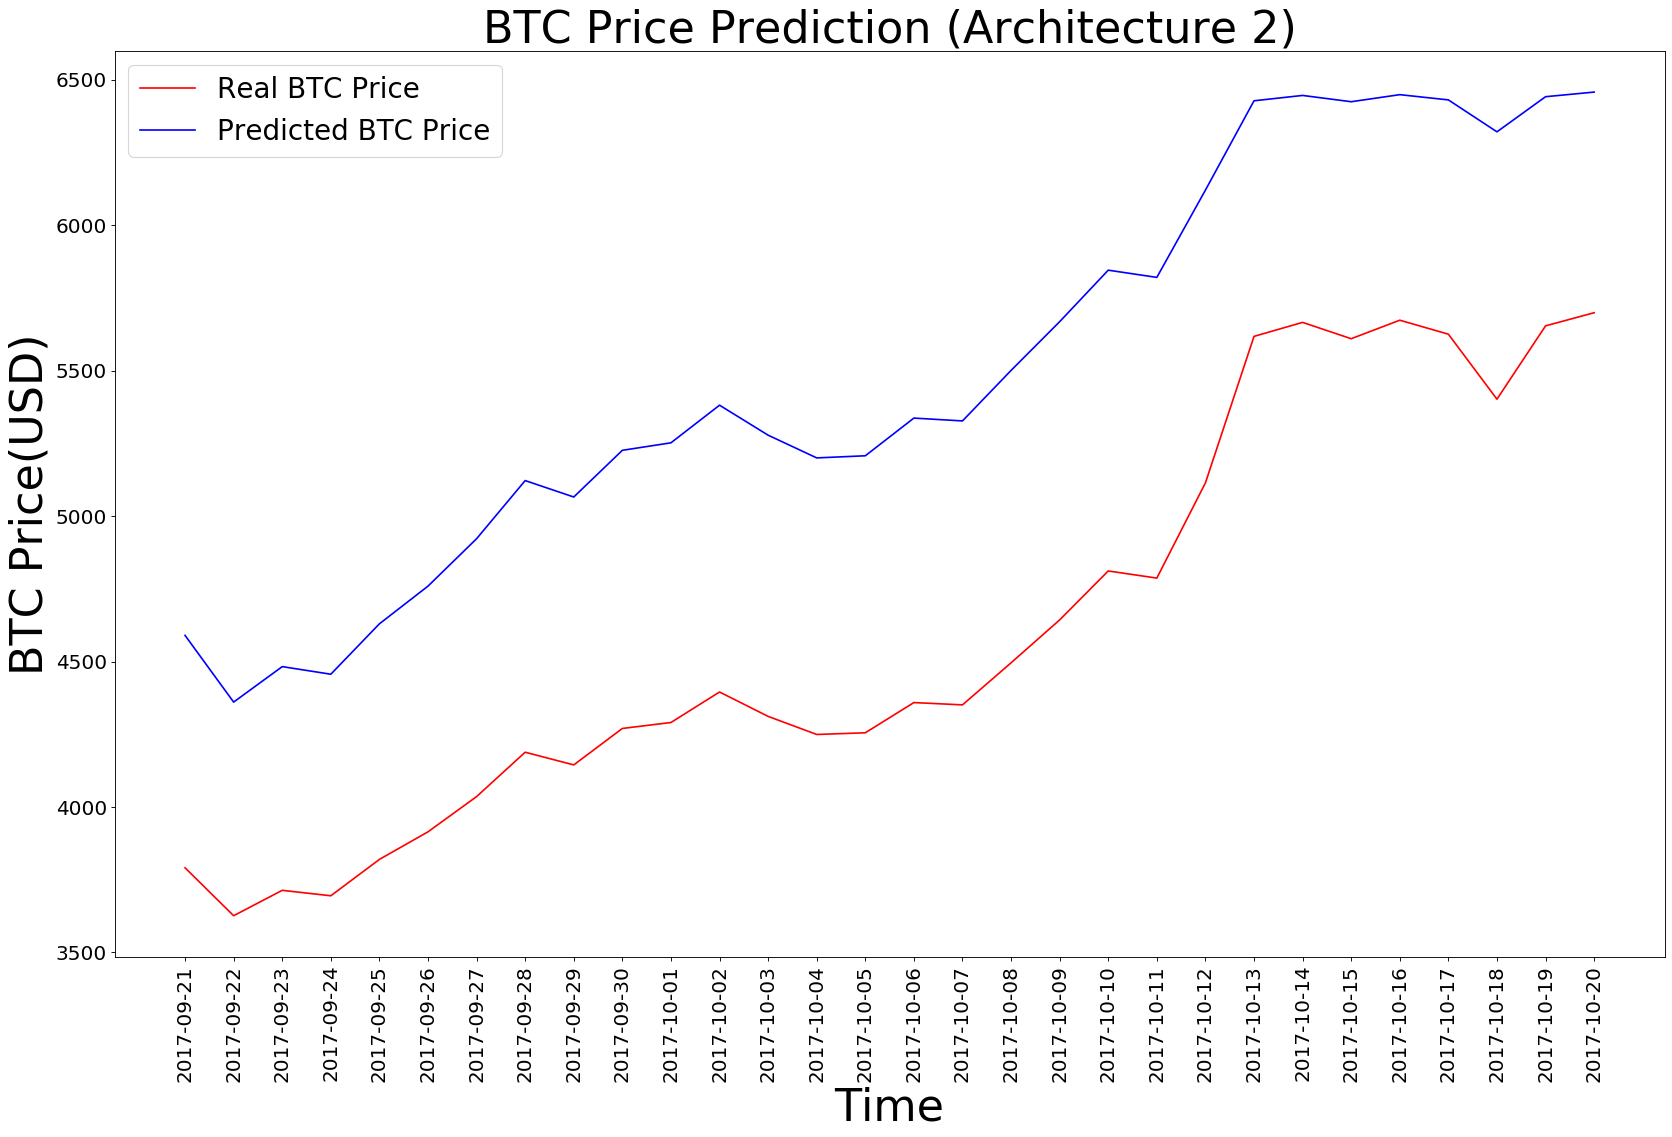

In [42]:
# prediction with architecture 1
model = load_model("model1.h5")

# split data
prediction_days = 30
#test Set
df_test= Real_Price[len(Real_Price)-prediction_days:]#(2118-30) to 2118

test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)

import time
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

pred_start_time = time.time()
predicted_BTC_price = model.predict(inputs)
pred_end_time = time.time()


pred_time = pred_end_time -pred_start_time 
print(pred_time)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)



# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction (Architecture 2)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.savefig("prediction2.jpg")
plt.legend(loc=2, prop={'size': 25})
plt.show()

0.29897308349609375


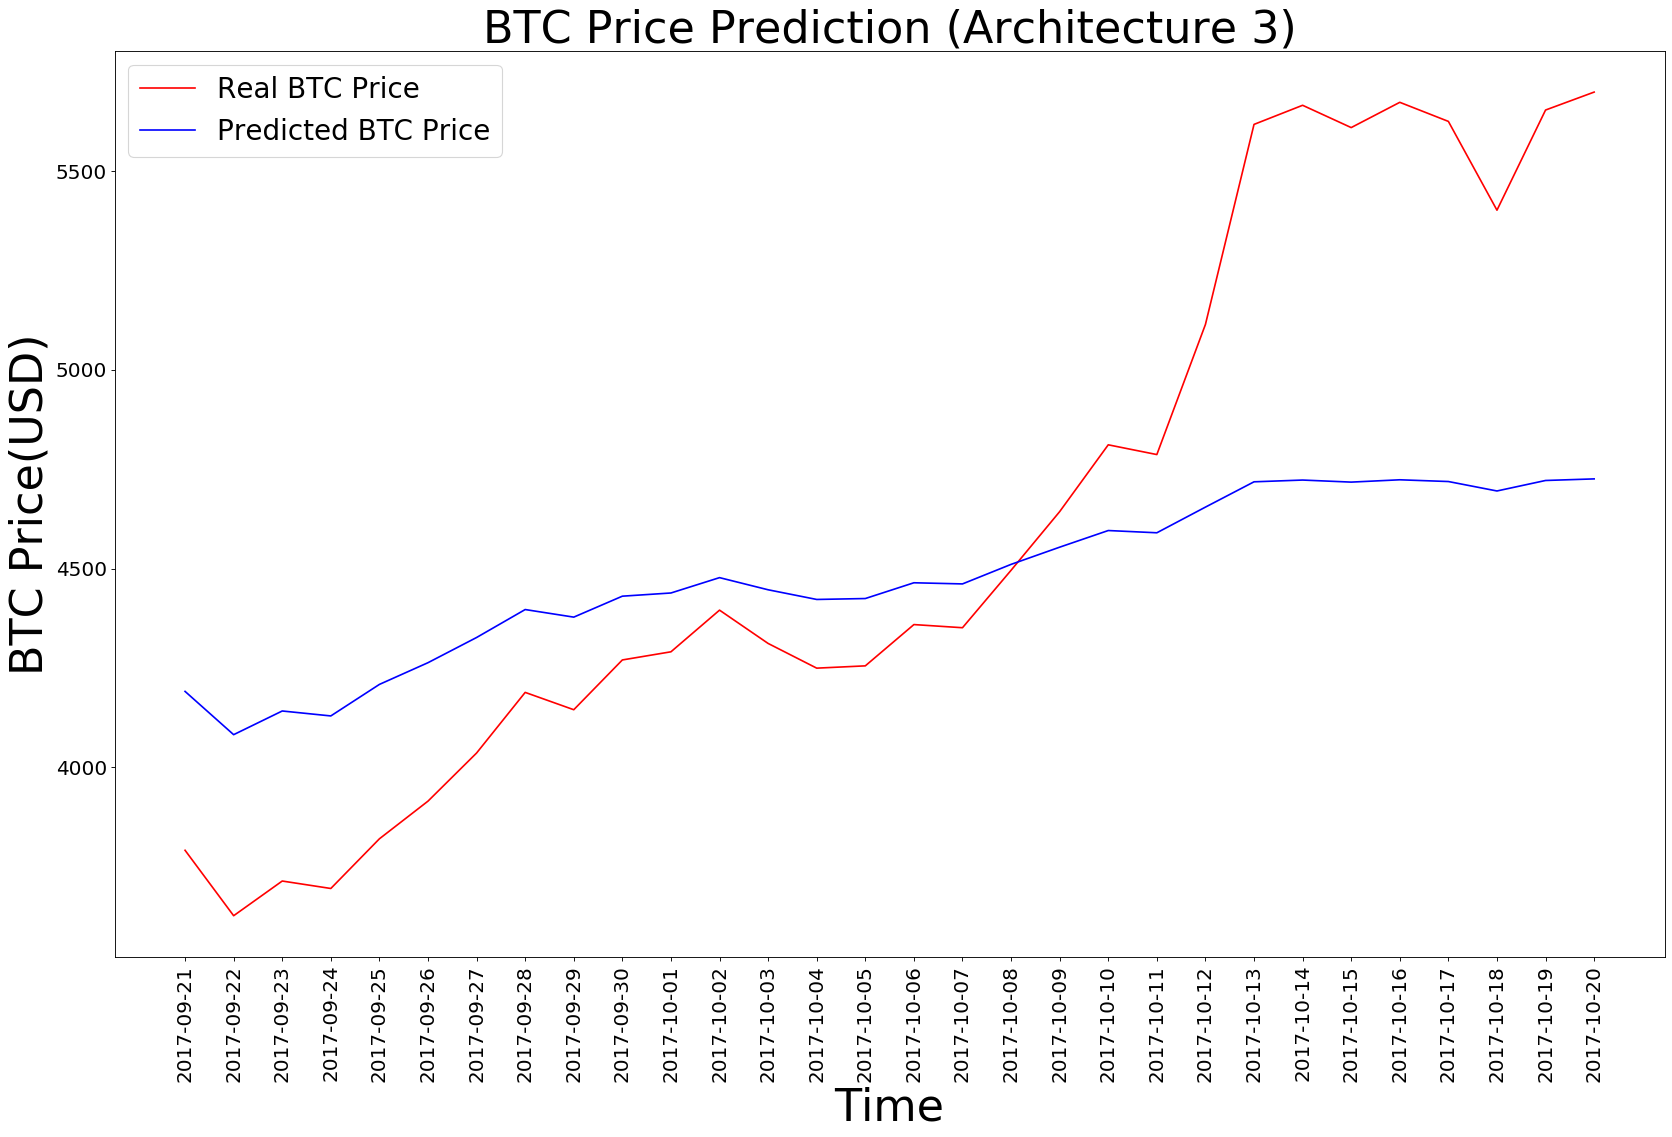

In [41]:
# prediction with architecture 1
model = load_model("model2.h5")

# split data
prediction_days = 30
#test Set
df_test= Real_Price[len(Real_Price)-prediction_days:]#(2118-30) to 2118

test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)

import time
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

pred_start_time = time.time()
predicted_BTC_price = model.predict(inputs)
pred_end_time = time.time()


pred_time = pred_end_time -pred_start_time 
print(pred_time)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)



# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction (Architecture 3)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.savefig("prediction3.jpg")
plt.legend(loc=2, prop={'size': 25})
img3 = plt.show()

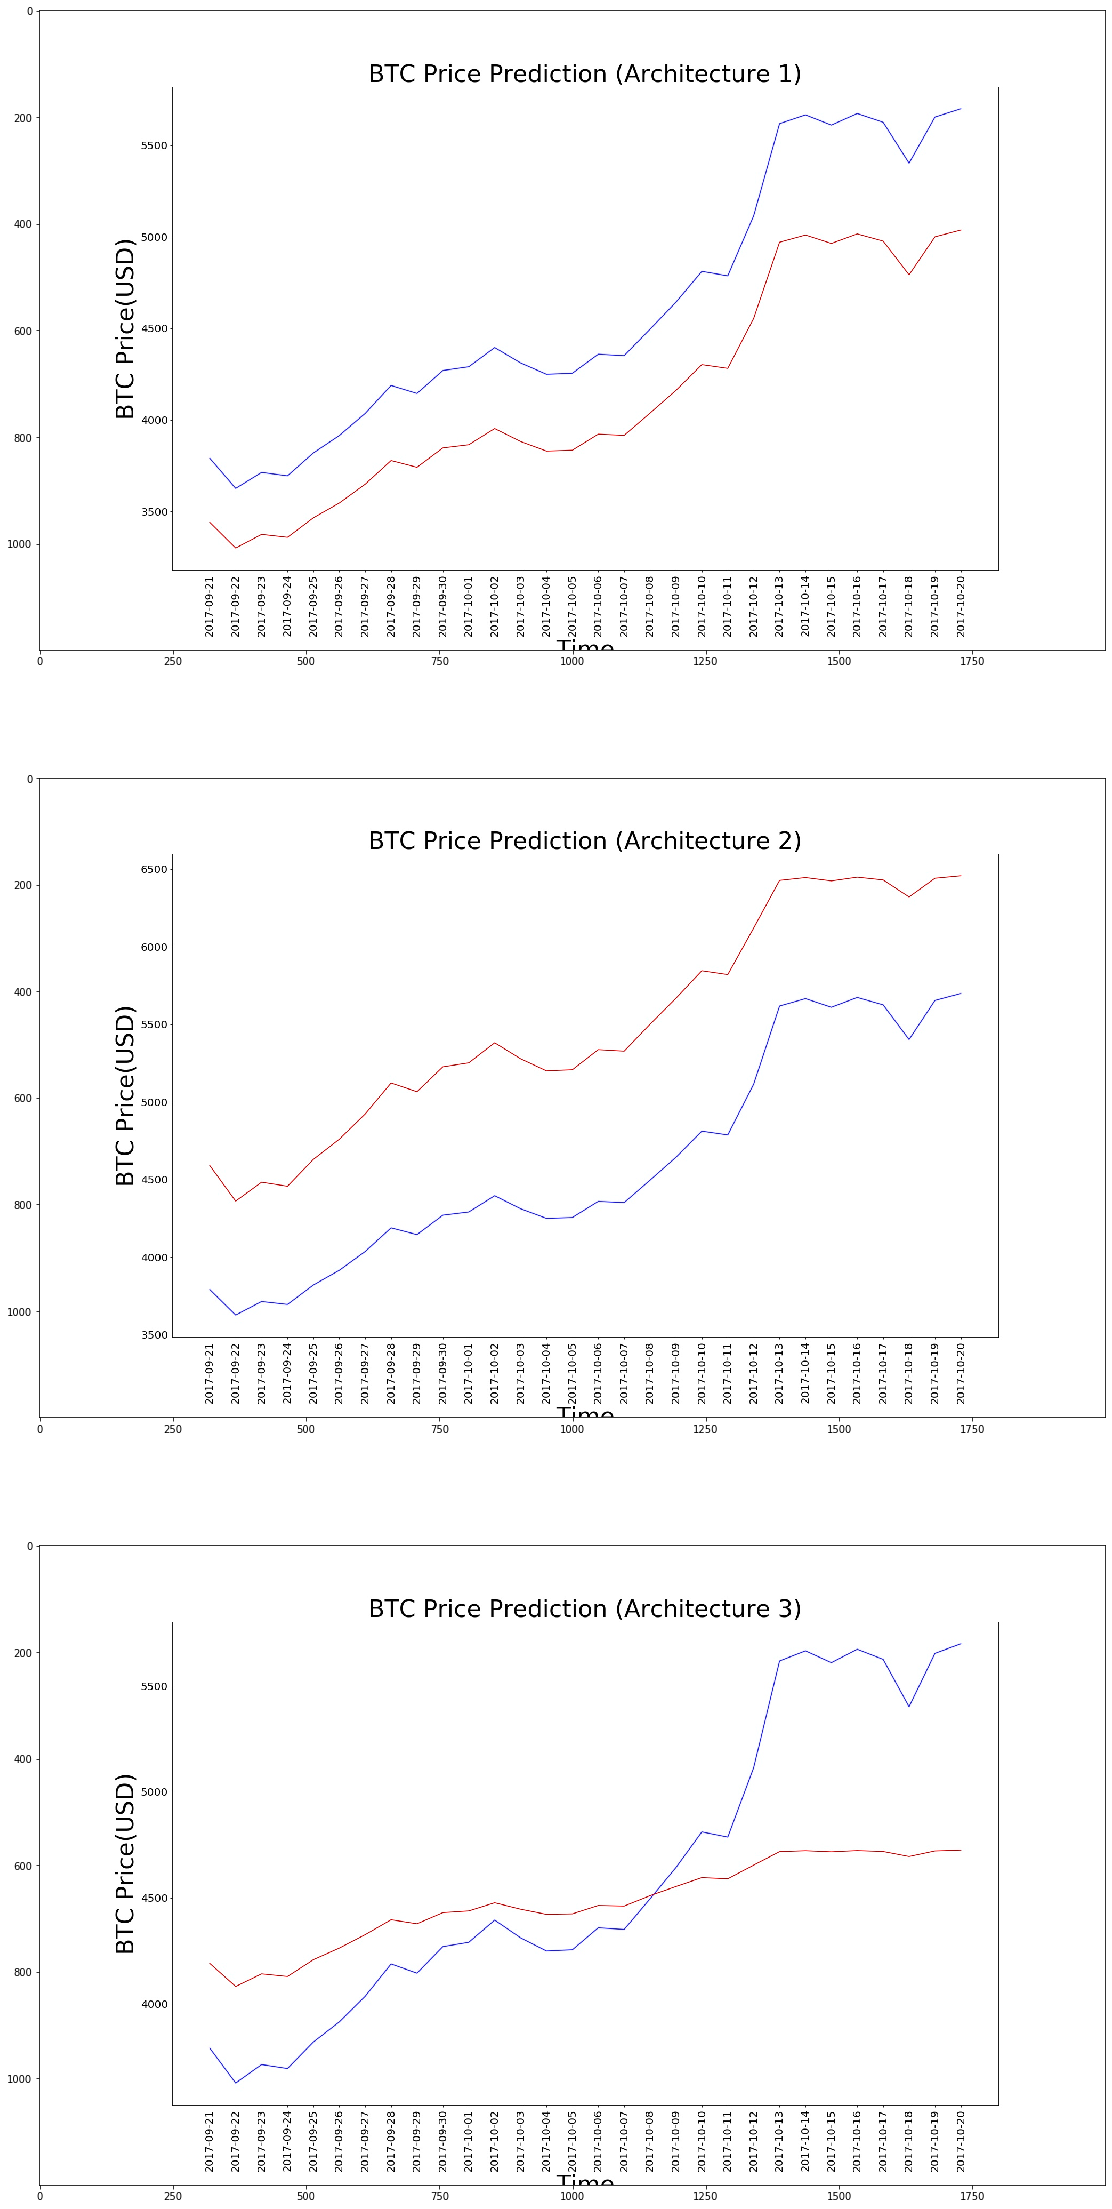

In [62]:
import cv2

img1=cv2.imread('Prediction1.jpg')
img2=cv2.imread('Prediction2.jpg')
img3=cv2.imread('Prediction3.jpg')
img = [img1,img2,img3]
w = 10
h = 10
fig = plt.figure(figsize=(25, 40))
# columns = 1
# rows = 3
for i in range(1,len(img)+1):
    fig.add_subplot(3,1,i)
    plt.imshow(img[i-1])
    
plt.savefig('pred_combined.jpg')
plt.show()



In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

model = load_model("model1.h5")

prediction_days = 30
#test Set
df_test= Real_Price[len(Real_Price)-prediction_days:]

test_set = df_test.values
# test_set_values = test_set

inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.fit_transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))


X_test = inputs[0:len(test_set)-1]
y_test = inputs[1:len(test_set)]
X_test = np.reshape(X_test, (len(X_test), 1, 1))

model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 332ms/step - loss: 0.0137 - acc: 0.0690


[0.01366699580103159, 0.06896551698446274]